In [91]:
!pip install optuna


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: C:\Users\rosac\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [92]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: C:\Users\rosac\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


## ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Î°úÎî©

In [84]:
train_audio_path = 'train'  
train_label_path = 'train_label.txt'  

In [93]:
import librosa
import matplotlib
import numpy as np
import sklearn
import tensorflow as tf
import ipykernel
print("librosa version:", librosa.__version__)
print("matplotlib version:", matplotlib.__version__)
print("numpy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)
print("tensorflow version:", tf.__version__)


librosa version: 0.11.0
matplotlib version: 3.9.4
numpy version: 2.0.2
scikit-learn version: 1.6.1
tensorflow version: 2.19.0


### Ï∫êÏãúÍ∞Ä ÏóÜÏùÑ Îïå
- Ï∫êÏãúÍ∞Ä ÏûàÎã§Î©¥ Î™©Ï∞®Ïùò "Ï∫êÏãúÎ°úÎ∂ÄÌÑ∞ MFCC Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ìï®Ïàò"Î•º Ïã§ÌñâÌïòÍ≥† ÎÇúÌõÑ Îã§Ïùå Îã®Í≥ÑÎ°ú ÎÑòÏñ¥Í∞ÄÏ£ºÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.

In [32]:
max_len = 4000
X, y = load_mfcc_data(train_audio_path, train_label_path, max_len)
X, scaler = standardize(X)

Loading MFCC: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4000/4000 [02:09<00:00, 30.99it/s]


In [33]:
test_audio_path = 'test'
test_label_path = 'test_label.txt'

### Ï∫êÏãúÍ∞Ä ÏóÜÏùÑ Îïå
- Ï∫êÏãúÍ∞Ä ÏûàÎã§Î©¥ Î™©Ï∞®Ïùò "Ï∫êÏãúÎ°úÎ∂ÄÌÑ∞ MFCC Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ìï®Ïàò"Î•º Ïã§ÌñâÌïòÍ≥† ÎÇúÌõÑ Îã§Ïùå Îã®Í≥ÑÎ°ú ÎÑòÏñ¥Í∞ÄÏ£ºÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.
- Ï∫êÏãúÎ•º ÏÉùÏÑ±ÌïòÍ≥† Ïã∂Îã§Î©¥ Î™©Ï∞®Ïùò "Îç∞Ïù¥ÌÑ∞ ÏÖã Ï∫êÏãú Ï†ÄÏû•"ÏùÑ Ïã§ÌñâÌïòÏãúÍ∏∞ Î∞îÎ¶ΩÎãàÎã§.

In [34]:
max_len = 2000

In [35]:
X_test, y_test = load_mfcc_data(test_audio_path, test_label_path, max_len)

ns_test = X_test.shape[0]
X_test, _ = standardize(X_test)

Loading MFCC: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [00:38<00:00, 51.29it/s]


### Îç∞Ïù¥ÌÑ∞ ÏÖã Ï∫êÏãú Ï†ÄÏû•
- ÏÇ¨Ïö© ÏòàÏãú
save_mfcc_cache(X, y, scaler, cache_prefix="train")
- ÏÇ¨Ïö© Ï°∞Í±¥
  - Î™©Ï∞®Ïùò "Ï∫êÏãúÍ∞Ä ÏóÜÏùÑ Îïå"Î•º Ïã§ÌñâÌïòÍ≥† ÎÇú ÌõÑ Ïã§ÌñâÌïòÏÖîÏïº Ìï©ÎãàÎã§.

#### Train set Ï∫êÏãú Ï†ÄÏû• Ìï®Ïàò
- test setÏùÑ ÏúÑÌïú ÏΩîÎìúÍ∞Ä ÏïÑÎãôÎãàÎã§. train setÏóêÎßå ÏÇ¨Ïö©ÌïòÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.

In [95]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏòàÏãú ÏÖÄ A ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ #
import os
import numpy as np
from sklearn.preprocessing import StandardScaler

def save_mfcc_cache_train(X, y, scaler, directory="cache/train"):
    os.makedirs(directory, exist_ok=True)
    X_path      = os.path.join(directory, "X.npy")
    y_path      = os.path.join(directory, "y.npy")
    scaler_path = os.path.join(directory, "scaler.npy")

    np.save(X_path, X)
    np.save(y_path, y)
    np.save(scaler_path, {'mean': scaler.mean_, 'scale': scaler.scale_})
    print("‚úÖ ÌïôÏäµÏö© Ï∫êÏãú Ï†ÄÏû• ÏôÑÎ£å:")
    print(f"   - X      ‚Üí {X_path}")
    print(f"   - y      ‚Üí {y_path}")
    print(f"   - scaler ‚Üí {scaler_path}")
# Ïù¥ ÏÖÄÏùÑ Ïã§ÌñâÌïòÎ©¥ ‚ÄúÌï®ÏàòÎßå Ï†ïÏùò‚ÄùÎêòÍ≥† Ï∂úÎ†•(ÌîÑÎ¶∞Ìä∏)ÏùÄ ÏóÜÏùå.
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏÖÄ A ÎÅù ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ #

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ÏòàÏãú ÏÖÄ B ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ #
# ÏúÑÏóêÏÑú Ïù¥ÎØ∏ Ï†ïÏùòÌïú save_mfcc_cache_train Ìï®ÏàòÎ•º "Ïã§Ï†úÎ°ú Ìò∏Ï∂ú"ÌïòÎäî Î∂ÄÎ∂Ñ
save_mfcc_cache_train(X, y, scaler, directory="cache/train")


‚úÖ ÌïôÏäµÏö© Ï∫êÏãú Ï†ÄÏû• ÏôÑÎ£å:
   - X      ‚Üí cache/train\X.npy
   - y      ‚Üí cache/train\y.npy
   - scaler ‚Üí cache/train\scaler.npy


#### Test set Ï∫êÏãú Ï†ÄÏû•
-  test setÏùÑ ÏúÑÌïú ÏΩîÎìúÏûÖÎãàÎã§.

In [96]:
os.makedirs("cache/test", exist_ok=True)
test_X_path = "cache/test/X.npy"
test_y_path = "cache/test/y.npy"

np.save(test_X_path, X_test)
np.save(test_y_path, y_test)
print("‚úÖ ÌÖåÏä§Ìä∏ÏÖã Ï∫êÏãú Ï†ÄÏû• ÏôÑÎ£å")


‚úÖ ÌÖåÏä§Ìä∏ÏÖã Ï∫êÏãú Ï†ÄÏû• ÏôÑÎ£å


### Ï∫êÏãúÎ°úÎ∂ÄÌÑ∞ MFCC Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ìï®Ïàò
- ÏÇ¨Ïö© ÏòàÏãú
X, y, scaler = load_mfcc_cache(cache_prefix="train")
- ÏÇ¨Ïö© Ï°∞Í±¥
  - Ïù¥ÌõÑ Ï∫êÏãúÎ•º Ï†ÄÏû•ÌïòÍ≥† ÎÇú ÌõÑÎäî Í≥ÑÏÜçÌï¥ÏÑú MFCC Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ìï®ÏàòÎ•º ÌôúÏö©Ìï¥ Ïù¥ÌõÑ, Î°úÎìúÌï† ÌïÑÏöî ÏóÜÏù¥ ÏÇ¨Ïö©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.

#### Train set Ï∫êÏãú Î°úÎìú Ìï®Ïàò

In [97]:
def load_mfcc_cache_train(directory="cache/train"):
    """
    ÏÑ§Î™Ö:
      - "cache/train/" Ìè¥Îçî ÏïÑÎûòÏóê Ï†ÄÏû•Îêú X.npy, y.npy, scaler.npy ÏÑ∏ ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄ,
        ÌëúÏ§ÄÌôîÎêú ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ X, Î†àÏù¥Î∏î y, Í∑∏Î¶¨Í≥† Î≥µÏõêÎêú StandardScaler Í∞ùÏ≤¥Î•º Î∞òÌôòÌï©ÎãàÎã§.
      - ÌååÏùºÏù¥ ÏóÜÏúºÎ©¥ FileNotFoundErrorÏùÑ Î∞úÏÉùÏãúÌÇµÎãàÎã§.

    Îß§Í∞úÎ≥ÄÏàò:
      directory : str, Ï∫êÏãúÍ∞Ä Ï†ÄÏû•Îêú ÌïôÏäµÏö© ÎîîÎ†âÌÑ∞Î¶¨ Í≤ΩÎ°ú (Ïòà: "cache/train")

    Î∞òÌôòÍ∞í:
      X      : np.ndarray, ÌïôÏäµÏö© ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞
      y      : np.ndarray, ÌïôÏäµÏö© Î†àÏù¥Î∏î
      scaler : sklearn.preprocessing.StandardScaler, Î≥µÏõêÎêú ÌëúÏ§ÄÌôî Í∞ùÏ≤¥
    """
    # 1. ÌååÏùº Í≤ΩÎ°ú Íµ¨ÏÑ±
    X_path      = os.path.join(directory, "X.npy")
    y_path      = os.path.join(directory, "y.npy")
    scaler_path = os.path.join(directory, "scaler.npy")

    # 2. ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂Ä Í≤ÄÏÇ¨
    if not (os.path.exists(X_path) and os.path.exists(y_path) and os.path.exists(scaler_path)):
        raise FileNotFoundError(f"‚ùå ÌïôÏäµÏö© Ï∫êÏãú ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§: {directory}")

    # 3. .npy ÌååÏùºÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Î°úÎìú
    X = np.load(X_path)
    y = np.load(y_path)
    scaler_params = np.load(scaler_path, allow_pickle=True).item()

    # 4. StandardScaler Í∞ùÏ≤¥Î°ú Î≥µÏõê
    scaler = StandardScaler()
    scaler.mean_  = scaler_params['mean']
    scaler.scale_ = scaler_params['scale']

    print(f"‚úÖ ÌïôÏäµÏö© Ï∫êÏãú Î∂àÎü¨Ïò§Í∏∞ ÏôÑÎ£å: {directory}")
    return X, y, scaler


#### test set Ï∫êÏãú Î°úÎìú

In [98]:
def load_mfcc_cache_test(directory="cache/test"):
    """
    ÏÑ§Î™Ö:
      - "cache/test/" Ìè¥Îçî ÏïÑÎûòÏóê Ï†ÄÏû•Îêú X.npy, y.npy Îëê ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄ
        ÌÖåÏä§Ìä∏Ïö© ÏûÖÎ†• X_testÏôÄ Î†àÏù¥Î∏î y_testÎ•º Î∞òÌôòÌï©ÎãàÎã§.
      - ÌååÏùºÏù¥ ÏóÜÏúºÎ©¥ FileNotFoundErrorÏùÑ Î∞úÏÉùÏãúÌÇµÎãàÎã§.

    Îß§Í∞úÎ≥ÄÏàò:
      directory : str, Ï∫êÏãúÍ∞Ä Ï†ÄÏû•Îêú ÌÖåÏä§Ìä∏Ïö© ÎîîÎ†âÌÑ∞Î¶¨ Í≤ΩÎ°ú (Ïòà: "cache/test")

    Î∞òÌôòÍ∞í:
      X_test : np.ndarray, ÌÖåÏä§Ìä∏Ïö© ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞
      y_test : np.ndarray, ÌÖåÏä§Ìä∏Ïö© Î†àÏù¥Î∏î
    """
    # 1. ÌååÏùº Í≤ΩÎ°ú Íµ¨ÏÑ±
    X_path = os.path.join(directory, "X.npy")
    y_path = os.path.join(directory, "y.npy")

    # 2. ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂Ä Í≤ÄÏÇ¨
    if not (os.path.exists(X_path) and os.path.exists(y_path)):
        raise FileNotFoundError(f"‚ùå ÌÖåÏä§Ìä∏Ïö© Ï∫êÏãú ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§: {directory}")

    # 3. .npy ÌååÏùºÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Î°úÎìú
    X_test = np.load(X_path)
    y_test = np.load(y_path)

    print(f"‚úÖ ÌÖåÏä§Ìä∏Ïö© Ï∫êÏãú Î∂àÎü¨Ïò§Í∏∞ ÏôÑÎ£å: {directory}")
    return X_test, y_test




## 1. ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Îü¨ ÏûÑÌè¨Ìä∏ Î∞è Îã§Ïö¥Î°úÎìú

In [99]:
# -------------------------------------------
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò Î∞è ÏûÑÌè¨Ìä∏
# -------------------------------------------
import os
import random
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import BinaryCrossentropy

# Ïû¨ÌòÑÏÑ± ÏÑ§Ï†ï
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


## Îç∞Ïù¥ÌÑ∞ Î°úÎî© Ìï®Ïàò Ï†ïÏùò

In [100]:
# -------------------------------------------
# 2. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Ìï®Ïàò Ï†ïÏùò
# -------------------------------------------
def load_mfcc_data(audio_path, label_path, max_len=200):
    entries = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                entries.append((parts[1], parts[-1]))
    df = pd.DataFrame(entries, columns=['filename','label'])

    X_list, y_list = [], []
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Loading MFCC"):
        fp = os.path.join(audio_path, row['filename'])
        if not os.path.isfile(fp):
            continue
        try:
            audio, sr = librosa.load(fp, sr=16000)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20).T # Í∏∞Ï°¥ÏóêÎäî 13Ïù¥ÏóàÏùå.
            if mfcc.shape[0] < max_len:
                mfcc = np.pad(mfcc, ((0, max_len-mfcc.shape[0]), (0,0)), mode='constant')
            else:
                mfcc = mfcc[:max_len]
            X_list.append(mfcc)
            y_list.append(0 if row['label']=='Real' else 1)
        except:
            continue

    return np.array(X_list), np.array(y_list)


def standardize(X):
    ns, nt, nf = X.shape
    scaler = StandardScaler().fit(X.reshape(-1, nf))
    X_scaled = scaler.transform(X.reshape(-1, nf)).reshape(ns, nt, nf)
    return X_scaled, scaler


## DNN Î™®Îç∏ Ï†ïÏùò

In [101]:
def build_dnn_model(
    input_shape,
    units1=128,         # Ï≤´ Î≤àÏß∏ Dense Î†àÏù¥Ïñ¥Ïùò Ïú†Îãõ Ïàò (ÌäúÎãù ÎåÄÏÉÅ)
    units2=64,          # Îëê Î≤àÏß∏ Dense Î†àÏù¥Ïñ¥Ïùò Ïú†Îãõ Ïàò (ÌäúÎãù ÎåÄÏÉÅ)
    dropout1=0.3,       # Ï≤´ Î≤àÏß∏ Dropout ÎπÑÏú® (ÌäúÎãù ÎåÄÏÉÅ)
    dropout2=0.3,       # Îëê Î≤àÏß∏ Dropout ÎπÑÏú® (ÌäúÎãù ÎåÄÏÉÅ)
    learning_rate=1e-3  # Adam ÌïôÏäµÎ•† (ÌäúÎãù ÎåÄÏÉÅ)
):
    """
    Í∏∞Ï°¥ Î™®Îç∏ Ï†ïÏùò Î∂ÄÎ∂ÑÏùÑ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ïù∏ÏûêÎ•º Î∞õÎèÑÎ°ù ÏàòÏ†ïÌïú Ìï®ÏàòÏûÖÎãàÎã§.
      - units1, units2: Í∞Å Dense Î†àÏù¥Ïñ¥Ïùò Ïú†Îãõ Í∞úÏàò
      - dropout1, dropout2: Í∞Å Dropout Î†àÏù¥Ïñ¥ ÎπÑÏú®
      - learning_rate: Adam ÏòµÌã∞ÎßàÏù¥Ï†Ä ÌïôÏäµÎ•†
    """
    model = models.Sequential([
        layers.Input(shape=input_shape, name="input_mfcc"),
        layers.Flatten(name="flatten"),

        # Ï≤´ Î≤àÏß∏ Dense Î∏îÎ°ù
        layers.Dense(units1, activation=None, name="dense_1"),
        layers.BatchNormalization(name="bn_1"),
        layers.Activation('relu', name="act_1"),
        layers.Dropout(dropout1, name="dropout_1"),

        # Îëê Î≤àÏß∏ Dense Î∏îÎ°ù
        layers.Dense(units2, activation=None, name="dense_2"),
        layers.BatchNormalization(name="bn_2"),
        layers.Activation('relu', name="act_2"),
        layers.Dropout(dropout2, name="dropout_2"),

        # Ï∂úÎ†•Ï∏µ
        layers.Dense(1, activation='sigmoid', name="output")
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [102]:
import optuna
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt  # ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ matplotlib Í∞ÄÏ†∏Ïò§Í∏∞


# === 2) objective Ìï®Ïàò Ï†ïÏùò ===
def objective(trial):
    # 2-1) ÌäúÎãùÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÉòÌîåÎßÅ
    units1 = trial.suggest_categorical("units1", [64, 96, 128, 192, 256, 384, 512])
    units2 = trial.suggest_categorical("units2", [32, 64, 128, 256])
    dropout1 = trial.suggest_float("dropout1", 0.1, 0.5, step=0.1)
    dropout2 = trial.suggest_float("dropout2", 0.1, 0.5, step=0.1)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    # 2-2) ÌïôÏäµ/Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=41
    )

    # 2-3) ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ (ÌïÑÏöî Ïãú)
    class_weights_array = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weight_dict = {cls: w for cls, w in zip(np.unique(y_train), class_weights_array)}

    # 2-4) Î™®Îç∏ ÏÉùÏÑ± (Ìï≠ÏÉÅ 2Í∞ú Î∏îÎ°ù)
    input_shape = X_train.shape[1:]
    model = build_dnn_model(
        input_shape=input_shape,
        units1=units1,
        units2=units2,
        dropout1=dropout1,
        dropout2=dropout2,
        learning_rate=learning_rate
    )

    # 2-5) ÏΩúÎ∞± Ï†ïÏùò
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
    ]

    # 2-6) Î™®Îç∏ ÌïôÏäµ
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=batch_size,
        class_weight=class_weight_dict,
        callbacks=callbacks,
        verbose=0
    )

    # 2-7) ÎßàÏßÄÎßâ ÏóêÌè≠Ïùò Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ Î∞òÌôò
    val_acc = history.history["val_accuracy"][-1]
    print(f"[Trial {trial.number:>2d}] "
          f"units1={units1}, units2={units2}, "
          f"dropout1={dropout1:.1f}, dropout2={dropout2:.1f}, "
          f"lr={learning_rate:.1e}, batch_size={batch_size} ‚Üí val_acc={val_acc:.4f}\n")
    return val_acc

[I 2025-06-04 23:09:16,649] A new study created in memory with name: no-name-f84695ab-d65b-424e-97db-5c8aacd4b066
Best trial: 0. Best value: 0.99:   3%|‚ñà‚ñã                                                | 1/30 [01:27<42:31, 87.97s/it]

[Trial  0] units1=128, units2=32, dropout1=0.5, dropout2=0.2, lr=2.0e-03, batch_size=32 ‚Üí val_acc=0.9900

[I 2025-06-04 23:10:44,722] Trial 0 finished with value: 0.9900000095367432 and parameters: {'units1': 128, 'units2': 32, 'dropout1': 0.5, 'dropout2': 0.2, 'learning_rate': 0.00200542189906824, 'batch_size': 32}. Best is trial 0 with value: 0.9900000095367432.


Best trial: 1. Best value: 0.9925:   7%|‚ñà‚ñà‚ñà‚ñè                                            | 2/30 [02:59<41:53, 89.77s/it]

[Trial  1] units1=128, units2=64, dropout1=0.3, dropout2=0.2, lr=9.0e-03, batch_size=16 ‚Üí val_acc=0.9925

[I 2025-06-04 23:12:15,755] Trial 1 finished with value: 0.9925000071525574 and parameters: {'units1': 128, 'units2': 64, 'dropout1': 0.30000000000000004, 'dropout2': 0.2, 'learning_rate': 0.008986401535704366, 'batch_size': 16}. Best is trial 1 with value: 0.9925000071525574.


Best trial: 1. Best value: 0.9925:  10%|‚ñà‚ñà‚ñà‚ñà‚ñä                                           | 3/30 [03:46<31:47, 70.63s/it]

[Trial  2] units1=64, units2=256, dropout1=0.4, dropout2=0.1, lr=1.8e-04, batch_size=64 ‚Üí val_acc=0.9925

[I 2025-06-04 23:13:03,612] Trial 2 finished with value: 0.9925000071525574 and parameters: {'units1': 64, 'units2': 256, 'dropout1': 0.4, 'dropout2': 0.1, 'learning_rate': 0.00018337341530797754, 'batch_size': 64}. Best is trial 1 with value: 0.9925000071525574.


Best trial: 1. Best value: 0.9925:  13%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                        | 4/30 [06:43<48:44, 112.47s/it]

[Trial  3] units1=256, units2=32, dropout1=0.4, dropout2=0.3, lr=2.2e-03, batch_size=16 ‚Üí val_acc=0.9925

[I 2025-06-04 23:16:00,216] Trial 3 finished with value: 0.9925000071525574 and parameters: {'units1': 256, 'units2': 32, 'dropout1': 0.4, 'dropout2': 0.30000000000000004, 'learning_rate': 0.002168224787366759, 'batch_size': 16}. Best is trial 1 with value: 0.9925000071525574.


Best trial: 4. Best value: 0.99375:  17%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                      | 5/30 [08:46<48:24, 116.18s/it]

[Trial  4] units1=256, units2=128, dropout1=0.1, dropout2=0.5, lr=2.1e-04, batch_size=64 ‚Üí val_acc=0.9937

[I 2025-06-04 23:18:02,971] Trial 4 finished with value: 0.9937499761581421 and parameters: {'units1': 256, 'units2': 128, 'dropout1': 0.1, 'dropout2': 0.5, 'learning_rate': 0.00021474538817864447, 'batch_size': 64}. Best is trial 4 with value: 0.9937499761581421.


Best trial: 4. Best value: 0.99375:  20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                    | 6/30 [11:50<55:47, 139.47s/it]

[Trial  5] units1=384, units2=128, dropout1=0.1, dropout2=0.3, lr=1.7e-03, batch_size=32 ‚Üí val_acc=0.9925

[I 2025-06-04 23:21:07,650] Trial 5 finished with value: 0.9925000071525574 and parameters: {'units1': 384, 'units2': 128, 'dropout1': 0.1, 'dropout2': 0.30000000000000004, 'learning_rate': 0.0017096169725210279, 'batch_size': 32}. Best is trial 4 with value: 0.9937499761581421.


Best trial: 4. Best value: 0.99375:  23%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                   | 7/30 [14:38<56:57, 148.59s/it]

[Trial  6] units1=384, units2=32, dropout1=0.2, dropout2=0.2, lr=5.8e-04, batch_size=64 ‚Üí val_acc=0.9925

[I 2025-06-04 23:23:55,012] Trial 6 finished with value: 0.9925000071525574 and parameters: {'units1': 384, 'units2': 32, 'dropout1': 0.2, 'dropout2': 0.2, 'learning_rate': 0.0005761783629938512, 'batch_size': 64}. Best is trial 4 with value: 0.9937499761581421.


Best trial: 4. Best value: 0.99375:  27%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                | 8/30 [19:29<1:11:11, 194.14s/it]

[Trial  7] units1=512, units2=32, dropout1=0.2, dropout2=0.1, lr=5.1e-04, batch_size=32 ‚Üí val_acc=0.9937

[I 2025-06-04 23:28:46,689] Trial 7 finished with value: 0.9937499761581421 and parameters: {'units1': 512, 'units2': 32, 'dropout1': 0.2, 'dropout2': 0.1, 'learning_rate': 0.0005140245634986926, 'batch_size': 32}. Best is trial 4 with value: 0.9937499761581421.


Best trial: 8. Best value: 0.995:  30%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                 | 9/30 [20:49<55:21, 158.19s/it]

[Trial  8] units1=128, units2=128, dropout1=0.1, dropout2=0.3, lr=4.1e-03, batch_size=32 ‚Üí val_acc=0.9950

[I 2025-06-04 23:30:05,826] Trial 8 finished with value: 0.9950000047683716 and parameters: {'units1': 128, 'units2': 128, 'dropout1': 0.1, 'dropout2': 0.30000000000000004, 'learning_rate': 0.004077968727491807, 'batch_size': 32}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  33%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                              | 10/30 [25:18<1:04:10, 192.53s/it]

[Trial  9] units1=384, units2=64, dropout1=0.4, dropout2=0.3, lr=4.2e-04, batch_size=16 ‚Üí val_acc=0.9925

[I 2025-06-04 23:34:35,250] Trial 9 finished with value: 0.9925000071525574 and parameters: {'units1': 384, 'units2': 64, 'dropout1': 0.4, 'dropout2': 0.30000000000000004, 'learning_rate': 0.0004208910318100536, 'batch_size': 16}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  37%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                             | 11/30 [26:34<49:41, 156.91s/it]

[Trial 10] units1=192, units2=128, dropout1=0.2, dropout2=0.5, lr=7.9e-03, batch_size=32 ‚Üí val_acc=0.9900

[I 2025-06-04 23:35:51,390] Trial 10 finished with value: 0.9900000095367432 and parameters: {'units1': 192, 'units2': 128, 'dropout1': 0.2, 'dropout2': 0.5, 'learning_rate': 0.007904489581192373, 'batch_size': 32}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  40%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                            | 12/30 [27:45<39:14, 130.81s/it]

[Trial 11] units1=96, units2=128, dropout1=0.1, dropout2=0.5, lr=1.2e-04, batch_size=64 ‚Üí val_acc=0.9937

[I 2025-06-04 23:37:02,506] Trial 11 finished with value: 0.9937499761581421 and parameters: {'units1': 96, 'units2': 128, 'dropout1': 0.1, 'dropout2': 0.5, 'learning_rate': 0.00012246791782617738, 'batch_size': 64}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  43%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                          | 13/30 [29:17<33:41, 118.93s/it]

[Trial 12] units1=256, units2=128, dropout1=0.1, dropout2=0.4, lr=4.5e-03, batch_size=64 ‚Üí val_acc=0.9925

[I 2025-06-04 23:38:34,109] Trial 12 finished with value: 0.9925000071525574 and parameters: {'units1': 256, 'units2': 128, 'dropout1': 0.1, 'dropout2': 0.4, 'learning_rate': 0.004450766921979733, 'batch_size': 64}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  47%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                         | 14/30 [30:47<29:23, 110.25s/it]

[Trial 13] units1=256, units2=128, dropout1=0.1, dropout2=0.4, lr=2.4e-04, batch_size=64 ‚Üí val_acc=0.9925

[I 2025-06-04 23:40:04,293] Trial 13 finished with value: 0.9925000071525574 and parameters: {'units1': 256, 'units2': 128, 'dropout1': 0.1, 'dropout2': 0.4, 'learning_rate': 0.00024354295012354963, 'batch_size': 64}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                        | 15/30 [31:51<24:03, 96.23s/it]

[Trial 14] units1=128, units2=256, dropout1=0.2, dropout2=0.4, lr=1.0e-03, batch_size=32 ‚Üí val_acc=0.9912

[I 2025-06-04 23:41:08,039] Trial 14 finished with value: 0.9912499785423279 and parameters: {'units1': 128, 'units2': 256, 'dropout1': 0.2, 'dropout2': 0.4, 'learning_rate': 0.00102304968348859, 'batch_size': 32}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                      | 16/30 [32:46<19:33, 83.84s/it]

[Trial 15] units1=96, units2=128, dropout1=0.3, dropout2=0.5, lr=4.2e-03, batch_size=32 ‚Üí val_acc=0.9925

[I 2025-06-04 23:42:03,119] Trial 15 finished with value: 0.9925000071525574 and parameters: {'units1': 96, 'units2': 128, 'dropout1': 0.30000000000000004, 'dropout2': 0.5, 'learning_rate': 0.004158061152982995, 'batch_size': 32}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                    | 17/30 [33:49<16:49, 77.64s/it]

[Trial 16] units1=192, units2=128, dropout1=0.1, dropout2=0.4, lr=9.2e-04, batch_size=64 ‚Üí val_acc=0.9925

[I 2025-06-04 23:43:06,322] Trial 16 finished with value: 0.9925000071525574 and parameters: {'units1': 192, 'units2': 128, 'dropout1': 0.1, 'dropout2': 0.4, 'learning_rate': 0.0009221720767103872, 'batch_size': 64}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                   | 18/30 [34:51<14:34, 72.90s/it]

[Trial 17] units1=64, units2=128, dropout1=0.2, dropout2=0.5, lr=1.0e-04, batch_size=64 ‚Üí val_acc=0.9937

[I 2025-06-04 23:44:08,199] Trial 17 finished with value: 0.9937499761581421 and parameters: {'units1': 64, 'units2': 128, 'dropout1': 0.2, 'dropout2': 0.5, 'learning_rate': 0.00010152496009329404, 'batch_size': 64}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                 | 19/30 [36:55<16:11, 88.32s/it]

[Trial 18] units1=256, units2=256, dropout1=0.3, dropout2=0.2, lr=2.8e-04, batch_size=32 ‚Üí val_acc=0.9937

[I 2025-06-04 23:46:12,452] Trial 18 finished with value: 0.9937499761581421 and parameters: {'units1': 256, 'units2': 256, 'dropout1': 0.30000000000000004, 'dropout2': 0.2, 'learning_rate': 0.0002834676860918393, 'batch_size': 32}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé               | 20/30 [43:23<29:42, 178.26s/it]

[Trial 19] units1=512, units2=64, dropout1=0.1, dropout2=0.4, lr=3.3e-03, batch_size=16 ‚Üí val_acc=0.9925

[I 2025-06-04 23:52:40,313] Trial 19 finished with value: 0.9925000071525574 and parameters: {'units1': 512, 'units2': 64, 'dropout1': 0.1, 'dropout2': 0.4, 'learning_rate': 0.003253967459727722, 'batch_size': 16}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ              | 21/30 [44:06<20:39, 137.69s/it]

[Trial 20] units1=128, units2=128, dropout1=0.5, dropout2=0.3, lr=9.3e-04, batch_size=64 ‚Üí val_acc=0.9925

[I 2025-06-04 23:53:23,428] Trial 20 finished with value: 0.9925000071525574 and parameters: {'units1': 128, 'units2': 128, 'dropout1': 0.5, 'dropout2': 0.30000000000000004, 'learning_rate': 0.0009258902517497897, 'batch_size': 64}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç            | 22/30 [49:13<25:06, 188.30s/it]

[Trial 21] units1=512, units2=32, dropout1=0.2, dropout2=0.1, lr=5.0e-04, batch_size=32 ‚Üí val_acc=0.9937

[I 2025-06-04 23:58:29,761] Trial 21 finished with value: 0.9937499761581421 and parameters: {'units1': 512, 'units2': 32, 'dropout1': 0.2, 'dropout2': 0.1, 'learning_rate': 0.0004986504803365764, 'batch_size': 32}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà           | 23/30 [53:51<25:08, 215.43s/it]

[Trial 22] units1=512, units2=32, dropout1=0.2, dropout2=0.1, lr=3.5e-04, batch_size=32 ‚Üí val_acc=0.9925

[I 2025-06-05 00:03:08,457] Trial 22 finished with value: 0.9925000071525574 and parameters: {'units1': 512, 'units2': 32, 'dropout1': 0.2, 'dropout2': 0.1, 'learning_rate': 0.0003457559707429875, 'batch_size': 32}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà         | 24/30 [1:01:25<28:41, 286.85s/it]

[Trial 23] units1=512, units2=32, dropout1=0.1, dropout2=0.2, lr=1.8e-04, batch_size=32 ‚Üí val_acc=0.9937

[I 2025-06-05 00:10:41,909] Trial 23 finished with value: 0.9937499761581421 and parameters: {'units1': 512, 'units2': 32, 'dropout1': 0.1, 'dropout2': 0.2, 'learning_rate': 0.00017581055878558818, 'batch_size': 32}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå       | 25/30 [1:04:41<21:37, 259.59s/it]

[Trial 24] units1=512, units2=128, dropout1=0.2, dropout2=0.1, lr=5.4e-04, batch_size=32 ‚Üí val_acc=0.9937

[I 2025-06-05 00:13:57,924] Trial 24 finished with value: 0.9937499761581421 and parameters: {'units1': 512, 'units2': 128, 'dropout1': 0.2, 'dropout2': 0.1, 'learning_rate': 0.0005417692750132729, 'batch_size': 32}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà      | 26/30 [1:06:50<14:41, 220.49s/it]

[Trial 25] units1=256, units2=32, dropout1=0.1, dropout2=0.3, lr=1.3e-03, batch_size=32 ‚Üí val_acc=0.9925

[I 2025-06-05 00:16:07,193] Trial 25 finished with value: 0.9925000071525574 and parameters: {'units1': 256, 'units2': 32, 'dropout1': 0.1, 'dropout2': 0.30000000000000004, 'learning_rate': 0.0012897574371728184, 'batch_size': 32}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 27/30 [1:08:01<08:46, 175.60s/it]

[Trial 26] units1=128, units2=256, dropout1=0.2, dropout2=0.4, lr=7.3e-04, batch_size=32 ‚Üí val_acc=0.9912

[I 2025-06-05 00:17:18,056] Trial 26 finished with value: 0.9912499785423279 and parameters: {'units1': 128, 'units2': 256, 'dropout1': 0.2, 'dropout2': 0.4, 'learning_rate': 0.000725353483237914, 'batch_size': 32}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 28/30 [1:09:19<04:52, 146.34s/it]

[Trial 27] units1=96, units2=64, dropout1=0.1, dropout2=0.2, lr=1.9e-04, batch_size=32 ‚Üí val_acc=0.9925

[I 2025-06-05 00:18:36,127] Trial 27 finished with value: 0.9925000071525574 and parameters: {'units1': 96, 'units2': 64, 'dropout1': 0.1, 'dropout2': 0.2, 'learning_rate': 0.00018603384266603021, 'batch_size': 32}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 29/30 [1:10:21<02:00, 120.99s/it]

[Trial 28] units1=64, units2=128, dropout1=0.2, dropout2=0.5, lr=6.3e-03, batch_size=16 ‚Üí val_acc=0.9912

[I 2025-06-05 00:19:37,974] Trial 28 finished with value: 0.9912499785423279 and parameters: {'units1': 64, 'units2': 128, 'dropout1': 0.2, 'dropout2': 0.5, 'learning_rate': 0.006328451419757687, 'batch_size': 16}. Best is trial 8 with value: 0.9950000047683716.


Best trial: 8. Best value: 0.995: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [1:11:08<00:00, 142.27s/it]

[Trial 29] units1=128, units2=32, dropout1=0.3, dropout2=0.2, lr=2.6e-03, batch_size=64 ‚Üí val_acc=0.9937

[I 2025-06-05 00:20:24,821] Trial 29 finished with value: 0.9937499761581421 and parameters: {'units1': 128, 'units2': 32, 'dropout1': 0.30000000000000004, 'dropout2': 0.2, 'learning_rate': 0.0026143909991963553, 'batch_size': 64}. Best is trial 8 with value: 0.9950000047683716.
========== ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ==========
units1: 128
units2: 128
dropout1: 0.1
dropout2: 0.30000000000000004
learning_rate: 0.004077968727491807
batch_size: 32


Epoch 1/50
100/100 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 47ms/step - accuracy: 0.9178 - loss: 0.2013 - val_accuracy: 0.8050 - val_loss: 0.7468 - learning_rate: 0.0041
Epoch 2/50
100/100 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 41ms/step - accuracy: 0.9964 - loss: 0.0197 - val_accuracy: 0.8637 - val_loss: 0.4787 - learning_rate: 0.0041
Epoch 3/50
100/100 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 41ms/step - accuracy: 0.9985 - loss: 0.0075 - val_accuracy: 0.8625 - val_loss: 0.4887 - learning_rate: 0.0041
Epoch 4/50
100/100 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 42ms/step - accuracy: 0.9983 - loss: 0.0052 - val_accuracy: 0.8725 - val_loss: 0.4813 - learning_rate: 0.0041
Epoch 5/50
100/100 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 45ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.8788 - val_loss: 0.5074 - learning_rate: 0.0041
Epoch 6/50
100/100 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

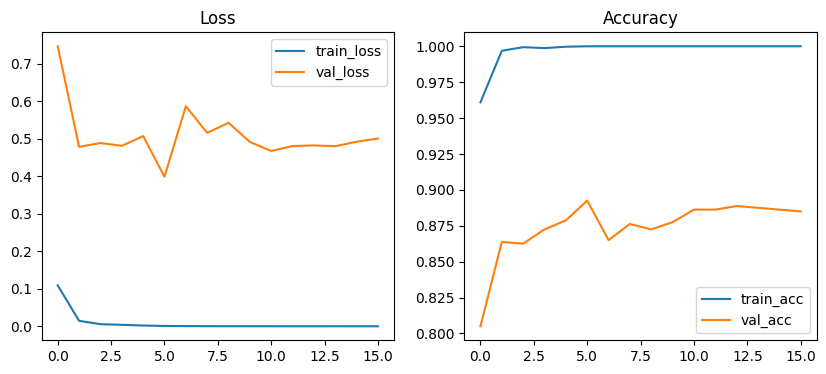

In [103]:
# ============================================
# 3) Optuna Ïä§ÌÑ∞Îîî ÏÉùÏÑ± Î∞è ÏµúÏ†ÅÌôî Ïã§Ìñâ
# ============================================
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30, show_progress_bar=True)

    print("========== ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ==========")
    for key, value in study.best_params.items():
        print(f"{key}: {value}")

    # ============================================
    # 4) ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïû¨ÌïôÏäµ
    # ============================================
    best = study.best_params
    final_model = build_dnn_model(
        input_shape=X.shape[1:],
        units1=best["units1"],
        units2=best["units2"],
        dropout1=best["dropout1"],
        dropout2=best["dropout2"],
        learning_rate=best["learning_rate"]
    )

    callbacks_final = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
    ]

    # 4-1) ÏµúÏ¢Ö ÌïôÏäµ Í≤∞Í≥ºÎ•º history Í∞ùÏ≤¥Î°ú Ï†ÄÏû•
    final_history = final_model.fit(
        X, y,
        validation_split=0.2,
        epochs=50,
        batch_size=best["batch_size"],
        class_weight={cls: w for cls, w in zip(np.unique(y), compute_class_weight(
            class_weight='balanced',
            classes=np.unique(y),
            y=y
        ))},
        callbacks=callbacks_final,
        verbose=1
    )

    # ============================================
    # 5) ÏµúÏ¢Ö ÌïôÏäµ Í≥ºÏ†ï ÏãúÍ∞ÅÌôî (plot_history Ìï®Ïàò ÏÇ¨Ïö©)
    # ============================================
    def plot_history(history):
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='train_loss')
        plt.plot(history.history['val_loss'], label='val_loss')
        plt.title("Loss")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='train_acc')
        plt.plot(history.history['val_accuracy'], label='val_acc')
        plt.title("Accuracy")
        plt.legend()

        plt.show()

    # plot_history Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÏó¨ ÌïôÏäµ/Í≤ÄÏ¶ù ÏßÄÌëú ÏãúÍ∞ÅÌôî
    plot_history(final_history)

    # 5-2) Î™®Îç∏ Ï†ÄÏû•
    final_model.save("dnn_model.h5")

In [104]:
# Optuna ÌäúÎãù ÏôÑÎ£å ÌõÑ, ÎèôÏùº best_valueÎ•º Í∞ÄÏßÑ Trial Ï§ë ÏµúÏ¢Ö BestÎ•º ÏÑ†ÌÉùÌïòÎäî ÌõÑÏ≤òÎ¶¨ ÏΩîÎìú

# 1) OptunaÍ∞Ä Í∏∞Î°ùÌïú ÏµúÍ≥† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ Í∞ÄÏ†∏Ïò§Í∏∞
best_value = study.best_value

# 2) ÎèôÏùºÌïú valueÎ•º Í∞ÄÏßÑ Î™®Îì† Trial Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
same_value_trials = [t for t in study.trials if t.value == best_value]

# 3) Î™®Îç∏ Î≥µÏû°ÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò (units1 * units2)
def model_complexity(trial):
    return trial.params.get("units1", float("inf")) * trial.params.get("units2", float("inf"))

# 4) Ïã§Ìñâ ÏãúÍ∞Ñ Í≥ÑÏÇ∞ Ìï®Ïàò
def trial_duration(trial):
    if trial.datetime_start and trial.datetime_complete:
        return (trial.datetime_complete - trial.datetime_start).total_seconds()
    return float("inf")

# 5) Tie-breaker: 1Ï∞® Í∏∞Ï§Ä=Î™®Îç∏ Î≥µÏû°ÎèÑ(ÏûëÏùÑÏàòÎ°ù Ïö∞ÏÑ†), 2Ï∞® Í∏∞Ï§Ä=Ïã§Ìñâ ÏãúÍ∞Ñ(ÏßßÏùÑÏàòÎ°ù Ïö∞ÏÑ†)
def tie_breaker_key(trial):
    return (model_complexity(trial), trial_duration(trial))

# 6) Ï†ïÎ†¨ ÌõÑ ÏµúÏ¢Ö Best Trial ÏÑ†ÌÉù
sorted_trials = sorted(same_value_trials, key=tie_breaker_key)
final_best = sorted_trials[0]

# 7) ÏµúÏ¢Ö Best ÌååÎùºÎØ∏ÌÑ∞
best_params = final_best.params

# ÏòàÏãú Ï∂úÎ†•
print("========== ÏµúÏ¢Ö Tie-breaker Ï†ÅÏö© Í≤∞Í≥º ==========")
for key, value in best_params.items():
    print(f"{key}: {value}")


========== ÏµúÏ¢Ö Tie-breaker Ï†ÅÏö© Í≤∞Í≥º ==========
units1: 128
units2: 128
dropout1: 0.1
dropout2: 0.30000000000000004
learning_rate: 0.004077968727491807
batch_size: 32


# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è ÌèâÍ∞Ä

ÌÖåÏä§Ìä∏ ÏÉòÌîåÎ≥Ñ ÏõêÎ≥∏ time_steps Í∏∏Ïù¥ Î∂ÑÌè¨:
  Í∏∏Ïù¥=2000Ïù∏ ÏÉòÌîå Ïàò: 2000

Ìå®Îî© Ï†ÑÌõÑ shape ÎπÑÍµê:
  ÏÉòÌîå 1: ÏõêÎ≥∏ (2000, 20) ‚Üí Ìå®Îî© ÌõÑ (4000, 20)
  ÏÉòÌîå 2: ÏõêÎ≥∏ (2000, 20) ‚Üí Ìå®Îî© ÌõÑ (4000, 20)
  ÏÉòÌîå 3: ÏõêÎ≥∏ (2000, 20) ‚Üí Ìå®Îî© ÌõÑ (4000, 20)
  ÏÉòÌîå 4: ÏõêÎ≥∏ (2000, 20) ‚Üí Ìå®Îî© ÌõÑ (4000, 20)
  ÏÉòÌîå 5: ÏõêÎ≥∏ (2000, 20) ‚Üí Ìå®Îî© ÌõÑ (4000, 20)

Ï†ÑÏ≤¥ Ìå®Îî© ÌõÑ X_test_padded.shape: (2000, 4000, 20)
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step

‚úÖ Classification Report - TEST DATA
              precision    recall  f1-score   support

        Real       0.84      0.99      0.91      1000
        Fake       0.99      0.81      0.89      1000

    accuracy                           0.90      2000
   macro avg       0.92      0.90      0.90      2000
weighted avg       0.92      0.90      0.90      2000

ROC AUC: 0.912


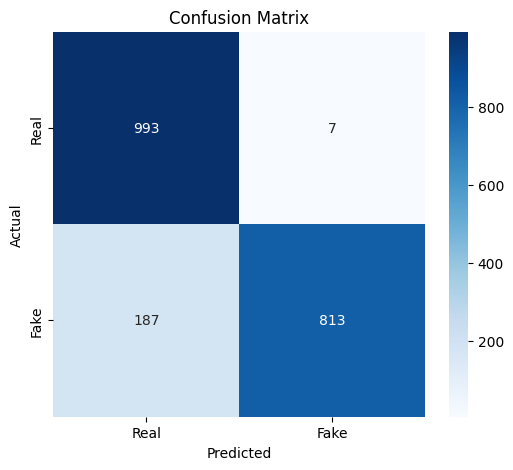

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# -------------------------------------------
# 6. ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä (Í∏∏Ïù¥ ÌôïÏù∏ ÌõÑ Ìå®Îî© Ìè¨Ìï®)
# -------------------------------------------

# (1) Ìå®Îî© ÎåÄÏÉÅ ÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÌôïÏù∏
#    X_test.shape == (n_samples, time_steps, n_features) Ïùº Îïå,
#    Í∞Å ÏÉòÌîåÏùò time_steps (Ïòà: mfcc.shape[0])Í∞Ä Î¨¥ÏóáÏù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
time_steps_list = [sample.shape[0] for sample in X_test]
unique_lengths, counts = np.unique(time_steps_list, return_counts=True)
print("ÌÖåÏä§Ìä∏ ÏÉòÌîåÎ≥Ñ ÏõêÎ≥∏ time_steps Í∏∏Ïù¥ Î∂ÑÌè¨:")
for length, cnt in zip(unique_lengths, counts):
    print(f"  Í∏∏Ïù¥={length}Ïù∏ ÏÉòÌîå Ïàò: {cnt}")
# Ïòà) Í∏∏Ïù¥=2000Ïù∏ ÏÉòÌîå Ïàò: 2000
#     (Î™®Îëê 2000Ïù¥ÎùºÎ©¥ Ïù¥ Ìïú Ï§ÑÎßå ÌëúÏãúÎê©ÎãàÎã§)

# (2) Ìå®Îî© Ìï®Ïàò Ï†ïÏùò: (time_steps, n_features) ‚Üí (4000, n_features)
def pad_to_4000(x: np.ndarray) -> np.ndarray:
    """
    x: np.ndarray of shape (time_steps, n_features)
    return: np.ndarray of shape (4000, n_features), Î∂ÄÏ°±Ìïú Î∂ÄÎ∂ÑÏùÄ Îí§Ïóê 0ÏúºÎ°ú Ï±ÑÏõÄ
    """
    current_len, n_feat = x.shape
    if current_len >= 4000:
        # Í∏∏Ïù¥Í∞Ä 4000 Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÏïûÏ™Ω 4000 ÌîÑÎ†àÏûÑÎßå ÏÇ¨Ïö©
        return x[:4000, :]
    # Î∂ÄÏ°±Ìïú Í∏∏Ïù¥ÎßåÌÅº Îí§Ï™ΩÏóê 0ÏúºÎ°ú Ìå®Îî©
    pad_width = 4000 - current_len
    padding = np.zeros((pad_width, n_feat), dtype=x.dtype)
    return np.concatenate([x, padding], axis=0)

# (3) Ìå®Îî© Ï†ÅÏö© Ï†Ñ/ÌõÑ Í∏∏Ïù¥Î•º ÎèôÏãúÏóê ÌôïÏù∏
print("\nÌå®Îî© Ï†ÑÌõÑ shape ÎπÑÍµê:")
for idx, sample in enumerate(X_test[:5]):  # Ï≤´ 5Í∞ú ÏÉòÌîåÎßå ÏòàÏãúÎ°ú Ï∂úÎ†•
    orig_shape = sample.shape
    padded = pad_to_4000(sample)
    print(f"  ÏÉòÌîå {idx+1}: ÏõêÎ≥∏ {orig_shape} ‚Üí Ìå®Îî© ÌõÑ {padded.shape}")

# (4) Ï†ÑÏ≤¥ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê Ìå®Îî© Ï†ÅÏö©
X_test_padded = np.array([pad_to_4000(sample) for sample in X_test])
#    Ïù¥Ï†ú X_test_padded.shape == (n_samples, 4000, n_features) Ïù¥Ïñ¥Ïïº Ìï©ÎãàÎã§.
print(f"\nÏ†ÑÏ≤¥ Ìå®Îî© ÌõÑ X_test_padded.shape: {X_test_padded.shape}")
# ÏòàÏãú: (2000, 4000, 20)

# (5) Î™®Îç∏ ÏòàÏ∏° (FlattenÏùÄ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûêÎèô Ï≤òÎ¶¨Îê®)
y_prob = model.predict(X_test_padded)  # shape: (n_samples, 1) ÎòêÎäî (n_samples,)
y_pred = (y_prob > 0.8).astype(int).reshape(-1)

# (6) ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
print("\n‚úÖ Classification Report - TEST DATA")
print(classification_report(y_test, y_pred, target_names=['Real','Fake']))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")

# (7) ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real','Fake'], yticklabels=['Real','Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
Ïó¨Í∏∞ÏÑú Î∂ÄÌÑ∞ Ïò§Î•òÎÇ®


## Spectral_Contrast ÌäπÏßï ÌôúÏö© Î™®Îç∏
- Ïò§Î∂ÑÎ•òÎêú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑú Îî∞Î°ú ÌäπÏßïÏùÑ Ï∂îÏ∂úÌïòÏó¨ Î∂ÑÎ•òÎ•º ÏãúÎèÑÌï®. Ïù¥Î•º ÌôúÏö©ÌïòÏó¨ ÏïΩ 1% ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ Í∞ÄÎä•ÌïòÏòÄÏùå.

In [106]:
import os
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm

def pad_to_4000(x: np.ndarray) -> np.ndarray:
    """
    x: np.ndarray of shape (time_steps, n_features)
    return: np.ndarray of shape (4000, n_features), Î∂ÄÏ°±Ìïú Î∂ÄÎ∂ÑÏùÄ Îí§Ïóê 0ÏúºÎ°ú Ï±ÑÏõÄ
    """
    current_len, n_feat = x.shape
    if current_len >= 4000:
        # Í∏∏Ïù¥Í∞Ä 4000 Ïù¥ÏÉÅÏù¥Î©¥ ÏïûÏ™Ω 4000ÌîÑÎ†àÏûÑÎßå ÏÇ¨Ïö©
        return x[:4000, :]
    pad_width = 4000 - current_len
    padding = np.zeros((pad_width, n_feat), dtype=x.dtype)
    return np.concatenate([x, padding], axis=0)

def predict_with_spectral_contrast(model, X_test, test_label_path, test_audio_path, score: float = 0.32):
    """
    1) X_test: np.ndarray of shape (n_samples, time_steps, n_features) ‚Äî Ìå®Îî© Ï†Ñ ÏÉÅÌÉúÏùº Ïàò ÏûàÏùå
    2) test_label_path: 'test_label.txt' ÌååÏùº Í≤ΩÎ°ú (Í≥µÎ∞±ÏúºÎ°ú Íµ¨Î∂ÑÎêú Îëê Î≤àÏß∏ Ïª¨Îüº=filename, Îã§ÏÑØ Î≤àÏß∏ Ïª¨Îüº=label)
    3) test_audio_path: ÌÖåÏä§Ìä∏ Ïò§ÎîîÏò§ ÌååÏùºÎì§Ïù¥ Îì§Ïñ¥ ÏûàÎäî Ìè¥Îçî Í≤ΩÎ°ú
    4) score: DNN ÌôïÎ•† ÏûÑÍ≥ÑÍ∞í (Ïòà: 0.32 Ïù¥ÌïòÏù∏ ÏÉòÌîåÎßå Spectral Contrast Î≥¥Ï†ï ÎåÄÏÉÅ)
    
    Î∞òÌôò:
      y_prob: np.ndarray of shape (n_samples,) ‚Äî Î≥¥Ï†ïÎêú ÌôïÎ•† Î≤°ÌÑ∞
    """
    # üîπ 0. X_test Í∏∏Ïù¥Í∞Ä 4000√ón_featuresÏù∏ÏßÄ ÌôïÏù∏ÌïòÍ≥†, ÏïÑÎãàÎ©¥ Ìå®Îî© Ï†ÅÏö©
    #    (Í∞Å ÏÉòÌîåÏù¥ np.ndarray ÌòïÌÉú, shape=(time_steps, n_features))
    padded_list = []
    for idx, sample in enumerate(X_test):
        # Í∏∏Ïù¥Î•º ÌôïÏù∏Ìï¥ÏÑú Ìå®Îî© ÎòêÎäî Ï†àÎã®
        padded_sample = pad_to_4000(sample)
        padded_list.append(padded_sample)
    X_test_padded = np.array(padded_list)  # shape = (n_samples, 4000, n_features)

    # üîπ 1. DNN ÏòàÏ∏°; ÎÇ¥Î∂Ä Flatten Î†àÏù¥Ïñ¥Í∞Ä (4000, n_features) ‚Üí (4000*n_features,)Î°ú ÏûêÎèô Ï≤òÎ¶¨
    y_prob = model.predict(X_test_padded).flatten()  # shape = (n_samples,)

    # üîπ 2. Î≥¥Ï†ï ÎåÄÏÉÅ: ÌôïÎ•†Ïù¥ ÎÇÆÏùÄ ÏÉòÌîå Ïù∏Îç±Ïä§
    uncertain_idx = np.where(y_prob < score)[0]

    # üîπ 3. test_label.txtÏóêÏÑú ÌååÏùº Ïù¥Î¶ÑÍ≥º Ïã§Ï†ú ÎùºÎ≤® Í∞ÄÏ†∏Ïò§Í∏∞
    #    (Îëê Î≤àÏß∏ Ïª¨ÎüºÏù¥ filename, Îã§ÏÑØ Î≤àÏß∏ Ïª¨ÎüºÏù¥ labelÏù¥ÎùºÍ≥† Í∞ÄÏ†ï)
    df = pd.read_csv(test_label_path, sep='\s+', header=None, usecols=[1, 4], names=['filename', 'label'])
    #    ÎùºÎ≤®ÏùÑ 0/1Î°ú Î≥ÄÌôò (Real=0, Fake=1)
    df['label'] = df['label'].map({'Real': 0, 'Fake': 1})

    test_filenames = df['filename'].tolist()
    y_test = df['label'].values.astype(int)

    # üîπ 4. Spectral Contrast Í∏∞Î∞ò Î≥¥Ï†ï
    for idx in tqdm(uncertain_idx, desc="üìå Spectral Contrast Î≥¥Ï†ï Ï§ë"):
        filename = test_filenames[idx]
        file_path = os.path.join(test_audio_path, filename)

        try:
            # Ïò§ÎîîÏò§ Î°úÎìú (sr=16000)
            y, sr = librosa.load(file_path, sr=16000)
            # Spectral Contrast Í≥ÑÏÇ∞
            contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
            # Í≥†Ï£ºÌåå 2Í∞ú Î∞¥Îìú ÌèâÍ∑†
            high_contrast = np.mean(contrast[-2:, :])
            # ÌäπÏ†ï Î≤îÏúÑ Ïù¥Ïô∏Î©¥ Fake(1)Î°ú Î≥¥Ï†ï
            if (high_contrast < 21.0) or (high_contrast > 27.0):
                y_prob[idx] = 1.0
        except Exception as e:
            print(f"‚ö†Ô∏è Error processing {filename}: {e}")

    return y_prob


In [61]:
print("X_test shape:", X_test.shape)


X_test shape: (2000, 2000, 20)


In [107]:
import numpy as np

# 1) (2000, 20) ‚Üí (4000, 20)Î°ú Í∏∏Ïù¥Î•º ÎßûÏ∂∞ Ï£ºÎäî Ìï®Ïàò
def pad_to_4000(x: np.ndarray) -> np.ndarray:
    """
    x: shape = (2000, 20) Î∞∞Ïó¥
    return: shape = (4000, 20) Î∞∞Ïó¥ (Î∂ÄÏ°±Ìïú Îí§Ïóê 0ÏúºÎ°ú Ï±ÑÏõÄ)
    """
    current_len, num_feat = x.shape  # (2000, 20)
    if current_len >= 4000:
        return x[:4000, :]
    else:
        pad_width = 4000 - current_len  # 2000
        padding = np.zeros((pad_width, num_feat), dtype=x.dtype)
        return np.concatenate([x, padding], axis=0)  # Í≤∞Í≥º: (4000, 20)

# 2) Ìå®Îî© ÌõÑ DNN ÏòàÏ∏°Îßå ÏàòÌñâÌïòÎäî Î≤ÑÏ†Ñ
def predict_with_spectral_contrast(model, X_test: np.ndarray, score: float = 0.5):
    """
    - X_test: shape = (n_samples, 2000, 20)
    - ÎÇ¥Î∂ÄÏóêÏÑú (2000, 20) ‚Üí (4000, 20)Î°ú Ìå®Îî©Ìïú Îí§ model.predict() Ìò∏Ï∂ú
    - Ïù¥ Ìï®Ïàò ÏïàÏóêÏÑú model.predict(X_test)Î•º Ï†àÎåÄ ÏßÅÏ†ë Ìò∏Ï∂úÌïòÏßÄ ÏïäÏäµÎãàÎã§.
    """
    # 2-1) Ï†ÑÏ≤¥ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Ìå®Îî©
    X_test_padded = np.array([pad_to_4000(sample) for sample in X_test])
    # Ïù¥Ï†ú X_test_padded.shape == (n_samples, 4000, 20)

    # 2-2) DNN ÏòàÏ∏° (Î™®Îç∏ ÎÇ¥Î∂ÄÏóê Flatten Î†àÏù¥Ïñ¥Í∞Ä ÏûàÏúºÎØÄÎ°ú, Í∑∏ÎåÄÎ°ú ÎÑ£ÏúºÎ©¥ Îê©ÎãàÎã§)
    y_prob = model.predict(X_test_padded).flatten()  # shape = (n_samples,)

    # (Spectral contrast Î≥¥Ï†ï Î°úÏßÅÏù¥ ÌïÑÏöî ÏóÜÏúºÎ©¥ Ïù¥ÎåÄÎ°ú return)
    return y_prob


63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step

‚úÖ Classification Report - TEST DATA
              precision    recall  f1-score   support

        Real       0.85      0.98      0.91      1000
        Fake       0.98      0.83      0.90      1000

    accuracy                           0.91      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.91      0.91      2000

ROC AUC: 0.912


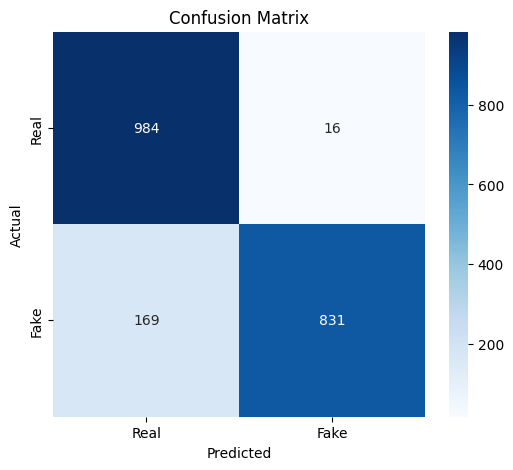

In [108]:
# üîπ 5. ÏµúÏ¢Ö Ïù¥ÏßÑ ÌåêÏ†ï (ÌôïÎ•† Í∏∞Ï§ÄÏùÄ 0.5 Ïú†ÏßÄ)
y_prob = predict_with_spectral_contrast(model,X_test, score=0.5)
y_pred = (y_prob >= 0.5).astype(int)
print("\n‚úÖ Classification Report - TEST DATA")
print(classification_report(y_test, y_pred, target_names=['Real','Fake']))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real','Fake'], yticklabels=['Real','Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Spectral contrast ÏµúÏ†ÅÌôî Í∏∞Ï§Ä ÏûêÎèôÌôî ÏÑ†Î≥Ñ Ìï®Ïàò (Ïã§Ìóò ÏΩîÎìú)

In [109]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

import os

# 1) Ïã§Ï†ú Ïò§ÎîîÏò§ ÌååÏùºÎì§Ïù¥ Îì§Ïñ¥ ÏûàÎäî ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú
test_audio_path = "test"   # ÏòàÏãú: ÌÖåÏä§Ìä∏ Ïò§ÎîîÏò§Í∞Ä Îì§Ïñ¥ ÏûàÎäî Ìè¥ÎçîÎ™Ö

# 2) Ìï¥Îãπ Ìè¥ÎçîÏóê ÏûàÎäî Î™®Îì† .wav ÌååÏùº Ïù¥Î¶ÑÏùÑ Î¶¨Ïä§Ìä∏Î°ú Í∞ÄÏ†∏Ïò§Í∏∞
test_filenames = sorted([
    f for f in os.listdir(test_audio_path)
    if f.lower().endswith('.wav')
])



def run_experiment(model, X_test, y_test, test_filenames, test_audio_path,
                   prob_thresholds=[0.3, 0.4, 0.5, 0.6],
                   contrast_bounds=[(22.0, 26.0), (23.0, 26.5), (22.5, 27.0)]):

    results = []

    for prob_thresh in prob_thresholds:
        for contrast_low, contrast_high in contrast_bounds:
                    # 1. DNN ÌôïÎ•† ÏòàÏ∏°
          y_prob = model.predict(X_test).flatten()

          # 2. Î≥¥Ï†ï ÎåÄÏÉÅ (ÌôïÎ•† Í∏∞Ï§Ä Ïù¥Ìïò)
          uncertain_idx = np.where(y_prob < prob_thresh)[0]

          # 3. Spectral Contrast Î≥¥Ï†ï
          for idx in tqdm(uncertain_idx, desc=f"üîç p<{prob_thresh}, c<{contrast_low} or >{contrast_high}"):
              file_path = os.path.join(test_audio_path, test_filenames[idx])
              try:
                  y, sr = librosa.load(file_path, sr=16000)
                  contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
                  high_contrast = np.mean(contrast[-2:, :])

                  # FakeÎ°ú Î≥¥Ï†ï Ï°∞Í±¥
                  if high_contrast < contrast_low or high_contrast > contrast_high:
                      y_prob[idx] = 1.0  # FakeÎ°ú Í∞ïÏ†ú Î≥¥Ï†ï
              except Exception as e:
                  print(f"‚ö†Ô∏è Error: {file_path} - {e}")
          for a in prob_thresholds:
            # 4. Ïù¥ÏßÑ Í≤∞Í≥º
            y_pred = (y_prob >= a).astype(int)

            # 5. ÏßÄÌëú Í≥ÑÏÇ∞
            acc = accuracy_score(y_test, y_pred)
            precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

            # 6. Í∏∞Î°ù
            results.append({
                'a' : a,
                'prob_thresh': prob_thresh,
                'contrast_low': contrast_low,
                'contrast_high': contrast_high,
                'accuracy': acc,
                'precision': precision,
                'recall': recall,
                'f1': f1
            })

    return pd.DataFrame(results)

In [110]:
import numpy as np

# (Ïù¥ÎØ∏ pad_to_4000 Ï†ïÏùòÌï¥ ÎëêÏÖ®Îã§Î©¥ Ïû¨Ï†ïÏùòÌï† ÌïÑÏöî ÏóÜÏäµÎãàÎã§)
def pad_to_4000(x: np.ndarray) -> np.ndarray:
    curr_len, n_feat = x.shape  # Ïòà: (2000,20)
    if curr_len >= 4000:
        return x[:4000, :]
    pad_width = 4000 - curr_len
    return np.concatenate([x, np.zeros((pad_width, n_feat), dtype=x.dtype)], axis=0)

def run_experiment(model, X_test, y_test, test_filenames, test_audio_path,
                   prob_thresholds, contrast_bounds):
    results = []
    
    # 1) ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥Î•º Î®ºÏ†Ä Ìå®Îî©Ìï¥ ÎëîÎã§
    #    X_test.shape == (n_samples, 2000, 20) ‚Üí X_test_padded.shape == (n_samples, 4000, 20)
    X_test_padded = np.array([pad_to_4000(x) for x in X_test])
    
    for prob_thresh in prob_thresholds:
        for contrast_low, contrast_high in contrast_bounds:
            # 2) DNN ÏòàÏ∏°: Î∞òÎìúÏãú X_test_paddedÎ•º ÎÑ£ÎäîÎã§
            y_prob = model.predict(X_test_padded).flatten()  # (n_samples,)
            
            # 3) DNN ÌôïÎ•† Í∏∞Î∞ò Î≥¥Ï†ï ÎåÄÏÉÅ Ïù∏Îç±Ïä§ Íµ¨ÌïòÍ∏∞
            uncertain_idx = np.where(y_prob < prob_thresh)[0]
            
            # (Ïó¨Í∏∞Ïóê Spectral Contrast Î≥¥Ï†ï Î°úÏßÅÏùÑ ÎÑ£Îêò, Ïó≠Ïãú X_test_padded ÏÇ¨Ïö©)
            # ÏòàÎ•º Îì§Ïñ¥:
            if len(uncertain_idx) > 0:
                sub_X = X_test_padded[uncertain_idx]
                # spec_scores = apply_spectral_contrast(sub_X, low=contrast_low, high=contrast_high)
                # y_prob[uncertain_idx] = spec_scores
            
            # 4) ÏµúÏ¢Ö Ïù¥ÏßÑ ÏòàÏ∏°
            y_pred = (y_prob >= prob_thresh).astype(int)
            
            # 5) ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ (Ïòà: precision, recall, f1 Îì±)
            #    ÏïÑÎûòÎäî ÏòàÏãú ‚Äì Ïã§Ï†úÎ°ú ÏõêÌïòÎäî metricÏùÑ Ï∂îÍ∞ÄÌïòÏÑ∏Ïöî.
            from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_prob)
            
            results.append({
                'prob_thresh': prob_thresh,
                'contrast_low': contrast_low,
                'contrast_high': contrast_high,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'auc': auc
            })
    
    import pandas as pd
    return pd.DataFrame(results)


In [111]:
# Ïã§Ìóò ÏÑ§Ï†ï Í∞í
prob_thresholds = [0.32]
contrast_bounds = [(21,27),(20.5, 27.5)]

# Ïã§Ìñâ
result_df = run_experiment(model, X_test, y_test, test_filenames, test_audio_path,
                           prob_thresholds, contrast_bounds)

# Í≤∞Í≥º Ï∂úÎ†• (F1-score Í∏∞Ï§Ä Ï†ïÎ†¨)
result_df_sorted = result_df.sort_values(by='f1', ascending=False).reset_index(drop=True)

from IPython.display import display
display(result_df_sorted)

63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step


prob_thresh  contrast_low  contrast_high  precision  recall        f1  \
0         0.32          21.0           27.0    0.97219   0.839  0.900698   
1         0.32          20.5           27.5    0.97219   0.839  0.900698   

        auc  
0  0.912454  
1  0.912454

# ÏòàÏ∏° Í≤∞Í≥º ÌååÏùº ÏûëÏÑ±

In [112]:
from sklearn.preprocessing import LabelEncoder

# 1. test ÌååÏùºÎ™Ö Î¶¨Ïä§Ìä∏ Î°úÎî©
def get_test_filenames(label_path):
    filenames = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                filenames.append(parts[1])
    return filenames

# 2. LabelEncoder: Fake ‚Üí 0, Real ‚Üí 1
le = LabelEncoder()
le.fit(['Fake', 'Real']) # Î∞òÎìúÏãú Ïù¥ ÏàúÏÑúÎ°ú ÏßÄÏ†ïÌï¥Ïïº 0=Fake, 1=Real

# 3. ÌååÏùº Ïù¥Î¶Ñ Î°úÎìú
test_file_names = get_test_filenames(test_label_path)

# 4. ÏòàÏ∏° ÌôïÎ•† ‚Üí ÌÅ¥ÎûòÏä§ (0 ÎòêÎäî 1) => Ï†ïÍ∑úÌôî Î∞©ÏãùÏóê Îî∞Îùº Ï†ïÌôïÎèÑÍ∞Ä Ï∞®Ïù¥Í∞Ä ÎÇ®.
y_pred_prob =predict_with_spectral_contrast(model,X_test, score=0.5)
# y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_pred_classes = (y_pred_prob <= 0.5).astype(int).flatten()  # ÌôïÎ•† ‚Üí 0 or 1


# 5. ÏòàÏ∏° Í≤∞Í≥º ÌååÏùº ÏûëÏÑ±
with open('./test_result.txt', 'w') as f:
    for i in range(len(y_pred_classes)):
        label_str = le.inverse_transform([y_pred_classes[i]])[0]  # 0 ‚Üí Fake, 1 ‚Üí Real
        f.write(f"{test_file_names[i]} {label_str}\n")

print("‚úÖ test_result.txt Ï†ÄÏû• ÏôÑÎ£å (Perl ÌèâÍ∞ÄÏö©)")

63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step
‚úÖ test_result.txt Ï†ÄÏû• ÏôÑÎ£å (Perl ÌèâÍ∞ÄÏö©)


In [113]:
import os

def evaluate_with_python(pred_path: str, true_path: str):
    """
    Perl eval.plÍ≥º ÎèôÏùºÌïòÍ≤å,
    1) pred_path ÌååÏùºÏùò Í∞Å Ï§ÑÏóêÏÑú Îëê Î≤àÏß∏ ÌÜ†ÌÅ∞(Ïù∏Îç±Ïä§1)ÏùÑ Í∫ºÎÇ¥,
    2) true_path ÌååÏùºÏùò Í∞Å Ï§ÑÏóêÏÑú Îã§ÏÑØ Î≤àÏß∏ ÌÜ†ÌÅ∞(Ïù∏Îç±Ïä§4)ÏùÑ Í∫ºÎÇ¥ ÎπÑÍµê,
    3) Ï†ÑÏ≤¥ ÎåÄÎπÑ ÎßûÏ∂ò ÎπÑÏú®(Accuracy)Í≥º ÎßûÏ∂ò Í∞úÏàò(hit), Ï¥ù Í∞úÏàò(total)ÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.
    """
    # 1) ÏòàÏ∏° ÌååÏùº ÏùΩÍ∏∞
    with open(pred_path, 'r', encoding='utf-8') as f_pred:
        lines_pred = [line.strip() for line in f_pred if line.strip()]
    
    # 2) Ï†ïÎãµ ÌååÏùº ÏùΩÍ∏∞
    with open(true_path, 'r', encoding='utf-8') as f_true:
        lines_true = [line.strip() for line in f_true if line.strip()]
    
    # 3) Îëê ÌååÏùºÏùò ÎùºÏù∏ ÏàòÍ∞Ä ÎèôÏùºÌï¥Ïïº Ï†ïÏÉÅ
    if len(lines_pred) != len(lines_true):
        print("Error: ÏòàÏ∏° ÌååÏùºÍ≥º Ï†ïÎãµ ÌååÏùºÏùò ÎùºÏù∏ ÏàòÍ∞Ä Îã§Î¶ÖÎãàÎã§.")
        print(f"  ÏòàÏ∏°({pred_path}) ÎùºÏù∏ Ïàò: {len(lines_pred)}")
        print(f"  Ï†ïÎãµ({true_path}) ÎùºÏù∏ Ïàò: {len(lines_true)}")
        return
    
    total = len(lines_pred)
    hit = 0
    
    # 4) Ìïú Ï§ÑÏî© ÏàúÌöåÌïòÎ©¥ÏÑú Îëê Î≤àÏß∏ ÌÜ†ÌÅ∞ vs Îã§ÏÑØ Î≤àÏß∏ ÌÜ†ÌÅ∞ ÎπÑÍµê
    for i, line_pred in enumerate(lines_pred):
        # Ïòà: "somefile.wav Fake"
        parts_pred = line_pred.split()
        # ÎßåÏïΩ ÌÜ†ÌÅ∞ Í∞úÏàòÍ∞Ä 2Í∞ú Ïù¥ÏÉÅÏù¥Ïñ¥Ïïº Îëê Î≤àÏß∏ ÌÜ†ÌÅ∞(parts_pred[1])Ïóê Ï†ëÍ∑º Í∞ÄÎä•
        if len(parts_pred) < 2:
            print(f"Warning: ÏòàÏ∏° ÌååÏùº {i+1}Î≤àÏß∏ Ï§Ñ ÌÜ†ÌÅ∞ Í∞úÏàò Î∂ÄÏ°± ‚Üí '{line_pred}'")
            continue
        predicted_label = parts_pred[1]
        
        # Ï†ïÎãµ Ï§Ñ: Î≥¥ÌÜµ Îã§ÏÑØ Î≤àÏß∏ ÌÜ†ÌÅ∞Ïù¥ TrueLabel
        # ex) "0 0 0 0 Real" ÎòêÎäî "xxx yyy zzz www Real"
        line_true = lines_true[i]
        parts_true = line_true.split()
        if len(parts_true) < 5:
            print(f"Warning: Ï†ïÎãµ ÌååÏùº {i+1}Î≤àÏß∏ Ï§Ñ ÌÜ†ÌÅ∞ Í∞úÏàò Î∂ÄÏ°± ‚Üí '{line_true}'")
            continue
        true_label = parts_true[4]
        
        if predicted_label == true_label:
            hit += 1
    
    # 5) Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
    accuracy = hit / total * 100.0
    
    # 6) Í≤∞Í≥º Ï∂úÎ†• (Perl Ïä§ÌÅ¨Î¶ΩÌä∏ÏôÄ ÎπÑÏä∑Ìïú Ìè¨Îß∑)
    print("============ Results Analysis ===========")
    print(f"Test : {os.path.basename(pred_path)}")
    print(f"True : {os.path.basename(true_path)}\n")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Hit: {hit}, Total: {total}")
    print("=========================================")


# ÏÇ¨Ïö© ÏòàÏãú
# 1) ÏúÑÏóê Ï†ïÏùòÌïú evaluate_with_python Ìï®ÏàòÍ∞Ä Ïù¥ÎØ∏ ÏÖÄÏóê ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.

# 2) Ìò∏Ï∂ú Ïãú Í≤ΩÎ°úÎ•º ÌååÏùºÎ™ÖÎßå ÏÇ¨Ïö©
test_pred_path = "test_result.txt"
test_true_path = "test_label.txt"

evaluate_with_python(test_pred_path, test_true_path)


evaluate_with_python(test_pred_path, test_true_path)


============ Results Analysis ===========
Test : test_result.txt
True : test_label.txt

Accuracy: 90.75%
Hit: 1815, Total: 2000
============ Results Analysis ===========
Test : test_result.txt
True : test_label.txt

Accuracy: 90.75%
Hit: 1815, Total: 2000
